In [44]:
# Import dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # For background of the graphs
%matplotlib inline

In [50]:
# Below is for regression model metrics and splitting the observations for train/test
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [51]:
# Removing warnings from the notebook
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read the data
raw_data_df = pd.read_csv("train.csv")

In [6]:
raw_data_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [7]:
# Information about the total data
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

### Categorical features
<p> The categorical features in this dataset are id, Year_Factor, State_Factor, building_class and facility_type.</p>
<p> Lets look at the values of each categories.</p>

In [8]:
pd.crosstab(index=raw_data_df["State_Factor"], columns="count")

col_0,count
State_Factor,
State_1,5618
State_10,15
State_11,6412
State_2,4871
State_4,4300
State_6,50840
State_8,3701


In [9]:
pd.crosstab(raw_data_df["Year_Factor"], columns="count")

col_0,count
Year_Factor,
1,2117
2,9058
3,10879
4,12946
5,18308
6,22449


In [10]:
pd.crosstab(raw_data_df["building_class"], columns="count")
#pd.crosstab(raw_data_df["building_class"], raw_data_df["site_eui"])

col_0,count
building_class,
Commercial,32199
Residential,43558


In [11]:
pd.crosstab(raw_data_df["facility_type"], columns="count")

col_0,count
facility_type,
2to4_Unit_Building,1893
5plus_Unit_Building,1273
Commercial_Other,1744
Commercial_Unknown,95
Data_Center,27
Education_College_or_university,1056
Education_Other_classroom,3860
Education_Preschool_or_daycare,108
Education_Uncategorized,709


### Continuous features
The continuous features in this dataset are floor area, energy_star_rating, elevation, january_min_temp, january_avg_temp, january_max_temp (similar for all months), cooling_degree_days, heating_degree_days, precipitation_inches, snowfall_inches, snowdepth_inches, avg_temp, days_below_30F, days_below_20F, days_below_10F, days_below_0F, days_above_80F, days_above_90F, days_above_100F, days_above_110F, direction_max_wind_speed, direction_peak_wind_speed, max_wind_speed, days_with_fog, site_eui.

In [12]:
pd.set_option("display.max_rows",100)

In [13]:
raw_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Factor,75757.0,4.367755,1.471441,1.000000,3.000000,5.000000,6.000000,6.000000e+00
floor_area,75757.0,165983.865858,246875.790940,943.000000,62379.000000,91367.000000,166000.000000,6.385382e+06
year_built,73920.0,1952.306764,37.053619,0.000000,1927.000000,1951.000000,1977.000000,2.015000e+03
energy_star_rating,49048.0,61.048605,28.663683,0.000000,40.000000,67.000000,85.000000,1.000000e+02
ELEVATION,75757.0,39.506323,60.656596,-6.400000,11.900000,25.000000,42.700000,1.924500e+03
january_min_temp,75757.0,11.432343,9.381027,-19.000000,6.000000,11.000000,13.000000,4.900000e+01
january_avg_temp,75757.0,34.310468,6.996108,10.806452,29.827586,34.451613,37.322581,6.475806e+01
january_max_temp,75757.0,59.054952,5.355458,42.000000,56.000000,59.000000,62.000000,9.100000e+01
february_min_temp,75757.0,11.720567,12.577272,-13.000000,2.000000,9.000000,20.000000,4.800000e+01
february_avg_temp,75757.0,35.526837,8.866697,13.250000,31.625000,34.107143,40.879310,6.510714e+01


# Attempt 1
<p> I'll just drop the columns with the missing values. Those are energy_star_rating, direction_max_wind_speed, direction_peak_wind_speed, max_wind_speed, days_with_fog and year_built.</p> 
<p> We will alternatively explore year_built to see if we can treat it instead of dropping it.</p>

In [33]:
# How many rows have the value 0 in year_built.
#(myDataFrame[column_name] == 0).sum()
(raw_data_df["year_built"] == 0).sum()

6

In [34]:
# How many rows are null in year_built
raw_data_df["year_built"].isnull().sum()

1837

For attempt_1, I'll also drop the year_built

In [35]:
trim_data_1_df = raw_data_df.drop(columns=["energy_star_rating", "direction_max_wind_speed", "direction_peak_wind_speed", "max_wind_speed", "days_with_fog", "year_built"])

In [36]:
len(raw_data_df.columns)

64

In [37]:
len(trim_data_1_df.columns)

58

In [38]:
trim_data_1_df.count()

Year_Factor             75757
State_Factor            75757
building_class          75757
facility_type           75757
floor_area              75757
ELEVATION               75757
january_min_temp        75757
january_avg_temp        75757
january_max_temp        75757
february_min_temp       75757
february_avg_temp       75757
february_max_temp       75757
march_min_temp          75757
march_avg_temp          75757
march_max_temp          75757
april_min_temp          75757
april_avg_temp          75757
april_max_temp          75757
may_min_temp            75757
may_avg_temp            75757
may_max_temp            75757
june_min_temp           75757
june_avg_temp           75757
june_max_temp           75757
july_min_temp           75757
july_avg_temp           75757
july_max_temp           75757
august_min_temp         75757
august_avg_temp         75757
august_max_temp         75757
september_min_temp      75757
september_avg_temp      75757
september_max_temp      75757
october_mi

I want to see the correlation between the different variables.

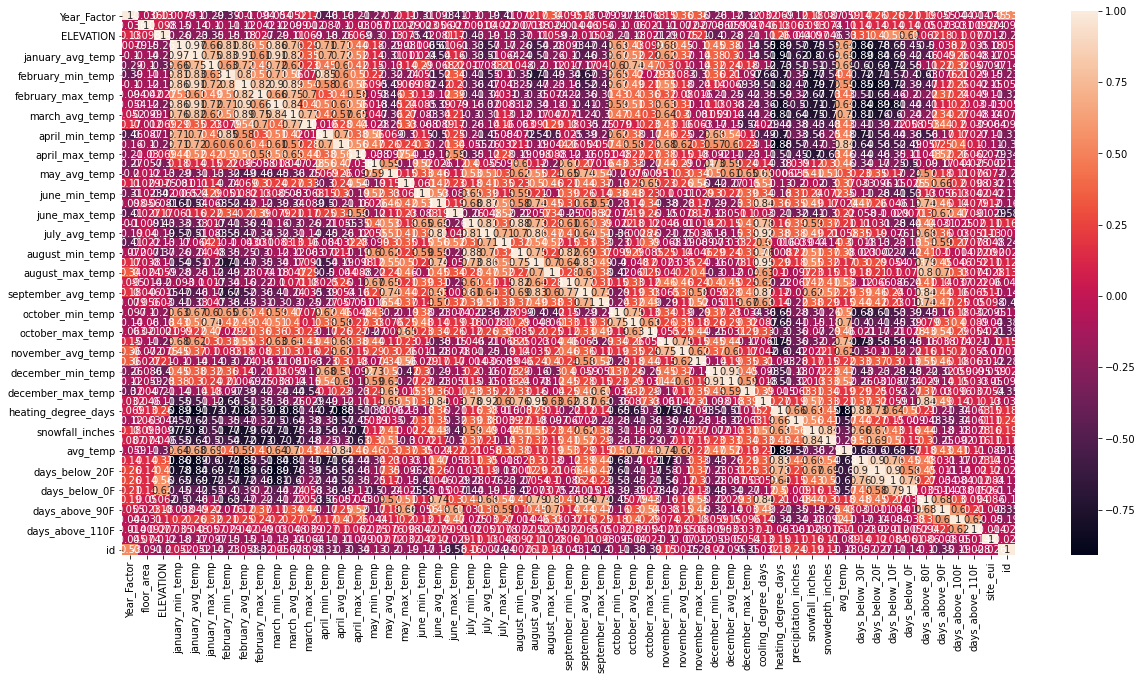

In [23]:
# Obtain the correlation matrix for the variable
plt.figure(figsize = (20, 10))
sns.heatmap(trim_data_1_df.corr(), annot = True)
plt.show()

In [39]:
# Divide the data into features and target
y = trim_data_1_df["site_eui"]
X = trim_data_1_df.drop(columns=["site_eui"])

In [40]:
# Drop irrelevant columns like id, as well as the categorical variables for now 
# (i.e. Year_Factor, State_Factor, building_class and facility_type.)
X = X.drop(columns=["id", "Year_Factor", "State_Factor", "building_class", "facility_type"])

In [41]:
X.columns

Index(['floor_area', 'ELEVATION', 'january_min_temp', 'january_avg_temp',
       'january_max_temp', 'february_min_temp', 'february_avg_temp',
       'february_max_temp', 'march_min_temp', 'march_avg_temp',
       'march_max_temp', 'april_min_temp', 'april_avg_temp', 'april_max_temp',
       'may_min_temp', 'may_avg_temp', 'may_max_temp', 'june_min_temp',
       'june_avg_temp', 'june_max_temp', 'july_min_temp', 'july_avg_temp',
       'july_max_temp', 'august_min_temp', 'august_avg_temp',
       'august_max_temp', 'september_min_temp', 'september_avg_temp',
       'september_max_temp', 'october_min_temp', 'october_avg_temp',
       'october_max_temp', 'november_min_temp', 'november_avg_temp',
       'november_max_temp', 'december_min_temp', 'december_avg_temp',
       'december_max_temp', 'cooling_degree_days', 'heating_degree_days',
       'precipitation_inches', 'snowfall_inches', 'snowdepth_inches',
       'avg_temp', 'days_below_30F', 'days_below_20F', 'days_below_10F',
       'da

In [47]:
X.shape

(75757, 52)

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   floor_area            75757 non-null  float64
 1   ELEVATION             75757 non-null  float64
 2   january_min_temp      75757 non-null  int64  
 3   january_avg_temp      75757 non-null  float64
 4   january_max_temp      75757 non-null  int64  
 5   february_min_temp     75757 non-null  int64  
 6   february_avg_temp     75757 non-null  float64
 7   february_max_temp     75757 non-null  int64  
 8   march_min_temp        75757 non-null  int64  
 9   march_avg_temp        75757 non-null  float64
 10  march_max_temp        75757 non-null  int64  
 11  april_min_temp        75757 non-null  int64  
 12  april_avg_temp        75757 non-null  float64
 13  april_max_temp        75757 non-null  int64  
 14  may_min_temp          75757 non-null  int64  
 15  may_avg_temp       

In [43]:
# Perform linear regression.

# Create an instance of the linear regression model
lr = LinearRegression()

# Fit the model
lr.fit(X,y)

LinearRegression()

In [45]:
#Get the coefficients and intercept
coef_num = pd.DataFrame(
    np.append(lr.coef_.flatten(), lr.intercept_),
    index=X.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
#print(coef_df,'.8f')
coef_num

,Coefficients
floor_area,0.000011
ELEVATION,-0.013863
january_min_temp,0.191360
january_avg_temp,-0.866413
january_max_temp,0.200836
february_min_temp,-0.727568
february_avg_temp,-3.150356
february_max_temp,0.530798
march_min_temp,0.231753
march_avg_temp,-0.364852


In [66]:
print(X.shape[0])

75757


In [67]:
# This function is used to calculate the RMSE, MAS (mean absolute score), 
# R2 (R-square) and the adjusted R2 (adjusted R-square)
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = X.shape[0]
    k = X.shape[1]
#     n = X.shape
#     k = y.shape
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = lr.predict(X)
    y_act = y.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(X, y_act, y_pred),
        },
        index=[0],
    )

In [68]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lr, X, y))

# # Checking model performance on test set
# print("\n\nTest Performance\n")
# print(model_perf(lr, x_test, y_test))

Training Performance

        RMSE        MAE       R^2  Adjusted R^2
0  56.943746  31.993654  0.044512      0.043855


# Attempt 2